## Notes

In [1]:
import nltk
from nltk.corpus import gutenberg
from nltk.corpus import brown
from nltk.corpus import inaugural
from nltk.corpus import wordnet as wn

In [2]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [7]:
# average word length, average sentence length, 'lexical diversity score'

for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid)))
    
    print(round(num_chars/num_words), round(num_words/num_sents), round(num_words/num_vocab), fileid)

5 25 26 austen-emma.txt
5 26 17 austen-persuasion.txt
5 28 22 austen-sense.txt
4 34 79 bible-kjv.txt
5 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 18 12 burgess-busterbrown.txt
4 20 13 carroll-alice.txt
5 20 12 chesterton-ball.txt
5 23 11 chesterton-brown.txt
5 18 11 chesterton-thursday.txt
4 21 25 edgeworth-parents.txt
5 26 15 melville-moby_dick.txt
5 52 11 milton-paradise.txt
4 12 9 shakespeare-caesar.txt
4 12 8 shakespeare-hamlet.txt
4 12 7 shakespeare-macbeth.txt
5 36 12 whitman-leaves.txt


In [78]:
sentences = gutenberg.sents("austen-emma.txt")

length_longest_sent = max(len(s) for s in sentences)
print("number of words in the longest sentence in 'austen-emma.txt'", length_longest_sent)

longest_sent = [s for s in sentences if len(s) == length_longest_sent][0]

' '.join(longest_sent)

number of words in the longest sentence in 'austen-emma.txt' 274


"While he lived , it must be only an engagement ; but she flattered herself , that if divested of the danger of drawing her away , it might become an increase of comfort to him .-- How to do her best by Harriet , was of more difficult decision ;-- how to spare her from any unnecessary pain ; how to make her any possible atonement ; how to appear least her enemy ?-- On these subjects , her perplexity and distress were very great -- and her mind had to pass again and again through every bitter reproach and sorrowful regret that had ever surrounded it .-- She could only resolve at last , that she would still avoid a meeting with her , and communicate all that need be told by letter ; that it would be inexpressibly desirable to have her removed just now for a time from Highbury , and -- indulging in one scheme more -- nearly resolve , that it might be practicable to get an invitation for her to Brunswick Square .-- Isabella had been pleased with Harriet ; and a few weeks spent in London mu

In [42]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [8]:
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre)
)
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']

cfd.tabulate(conditions=genres, samples=modals)

can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


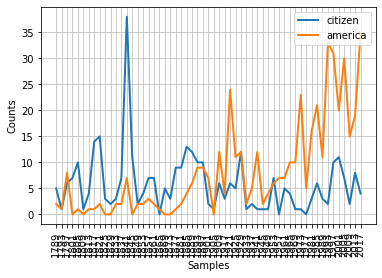

In [50]:
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['america', 'citizen']
    if w.lower().startswith(target)
)

cfd.plot()

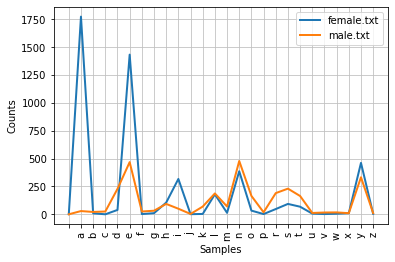

In [51]:
names = nltk.corpus.names

cfd = nltk.ConditionalFreqDist(
    (fileid, name[-1])
    for fileid in names.fileids()
    for name in names.words(fileid)
)

cfd.plot()

In [9]:
print(wn.synsets('cute'))
print([l.lemma_names() for l in wn.synsets('cute')])

[Synset('cunning.s.01'), Synset('cute.s.02')]
[['cunning', 'cute'], ['cute', 'precious']]


In [11]:
print([l.definition() for l in wn.synsets('cute')])

['attractive especially by means of smallness or prettiness or quaintness', 'obviously contrived to charm']


In [12]:
print([l.examples() for l in wn.synsets('cute')])

[['a cute kid with pigtails', 'a cute little apartment', 'cunning kittens', 'a cunning baby'], ['an insufferably precious performance', 'a child with intolerably cute mannerisms']]


In [15]:
# doesn't work in the notebook but works in a python console
# nltk.app.wordnet()

In [26]:
chess_king = [l for l in wn.synsets('king') if "chess" in l.definition()][0]

chess_king

Synset('king.n.10')

In [74]:
print("name: ", chess_king.name())
print("lemma_names: ", chess_king.lemma_names())
print("definition: ", chess_king.definition())
print("examples: ", chess_king.examples())
print("hyponyms: ", chess_king.hyponyms())
print()
print("hyponyms: ", chess_king.hypernym_distances())
print()
print("attributes: ", chess_king.attributes())
print("also_sees: ", chess_king.also_sees())
print("causes: ", chess_king.causes())
print("topic_domains: ", chess_king.topic_domains())
print("usage_domains: ", chess_king.usage_domains())
print("verb_groups: ", chess_king.verb_groups())
print("offset: ", chess_king.offset())
print("root_hypernyms: ", chess_king.root_hypernyms())
print("lexname: ", chess_king.lexname())
print("pos: ", chess_king.pos())
print("frame_ids: ", chess_king.frame_ids())
print("also_sees: ", chess_king.also_sees())
print()
print("part_meronyms: ", chess_king.part_meronyms())
print("substance_meronyms: ", chess_king.substance_meronyms())
print("member_meronyms: ", chess_king.member_meronyms())
print("part_holonyms: ", chess_king.part_holonyms())
print("substance_holonyms: ", chess_king.substance_holonyms())
print("member_holonyms: ", chess_king.member_holonyms())

name:  king.n.10
lemma_names:  ['king']
definition:  (chess) the weakest but the most important piece
examples:  []
hyponyms:  []

hyponyms:  {(Synset('entity.n.01'), 10), (Synset('king.n.10'), 0), (Synset('object.n.01'), 8), (Synset('equipment.n.01'), 4), (Synset('instrumentality.n.03'), 5), (Synset('game_equipment.n.01'), 3), (Synset('chessman.n.01'), 1), (Synset('physical_entity.n.01'), 9), (Synset('whole.n.02'), 7), (Synset('artifact.n.01'), 6), (Synset('man.n.10'), 2)}

attributes:  []
also_sees:  []
causes:  []
topic_domains:  [Synset('chess.n.02')]
usage_domains:  []
verb_groups:  []
offset:  3618101
root_hypernyms:  [Synset('entity.n.01')]
lexname:  noun.artifact
pos:  n
frame_ids:  []
also_sees:  []

part_meronyms:  []
substance_meronyms:  []
member_meronyms:  []
part_holonyms:  []
substance_holonyms:  []
member_holonyms:  []


In [2]:
car = wn.synsets("car")[0]

print("name: ", car.name())
print("lemma_names: ", car.lemma_names())
print("definition: ", car.definition())
print("examples: ", car.examples())
print()
print("hyponyms: ", car.hyponyms())
print()
print("hyponyms: ", car.hypernym_distances())
print()
print("attributes: ", car.attributes())
print("also_sees: ", car.also_sees())
print("causes: ", car.causes())
print("topic_domains: ", car.topic_domains())
print("usage_domains: ", car.usage_domains())
print("verb_groups: ", car.verb_groups())
print("offset: ", car.offset())
print("root_hypernyms: ", car.root_hypernyms())
print("lexname: ", car.lexname())
print("pos: ", car.pos())
print("frame_ids: ", car.frame_ids())
print("also_sees: ", car.also_sees())
print()
print("part_meronyms: ", car.part_meronyms())
print("substance_meronyms: ", car.substance_meronyms())
print("member_meronyms: ", car.member_meronyms())
print("part_holonyms: ", car.part_holonyms())
print("substance_holonyms: ", car.substance_holonyms())
print("member_holonyms: ", car.member_holonyms())

name:  car.n.01
lemma_names:  ['car', 'auto', 'automobile', 'machine', 'motorcar']
definition:  a motor vehicle with four wheels; usually propelled by an internal combustion engine
examples:  ['he needs a car to get to work']

hyponyms:  [Synset('ambulance.n.01'), Synset('beach_wagon.n.01'), Synset('bus.n.04'), Synset('cab.n.03'), Synset('compact.n.03'), Synset('convertible.n.01'), Synset('coupe.n.01'), Synset('cruiser.n.01'), Synset('electric.n.01'), Synset('gas_guzzler.n.01'), Synset('hardtop.n.01'), Synset('hatchback.n.01'), Synset('horseless_carriage.n.01'), Synset('hot_rod.n.01'), Synset('jeep.n.01'), Synset('limousine.n.01'), Synset('loaner.n.02'), Synset('minicar.n.01'), Synset('minivan.n.01'), Synset('model_t.n.01'), Synset('pace_car.n.01'), Synset('racer.n.02'), Synset('roadster.n.01'), Synset('sedan.n.01'), Synset('sport_utility.n.01'), Synset('sports_car.n.01'), Synset('stanley_steamer.n.01'), Synset('stock_car.n.01'), Synset('subcompact.n.01'), Synset('touring_car.n.01'), S

In [71]:
wn.synsets("entity")[0].definition()

'that which is perceived or known or inferred to have its own distinct existence (living or nonliving)'

## Exercises

1. Create a variable phrase containing a list of words. Review the operations described in the previous chapter, including addition, multiplication, indexing, slicing, and sorting.

2. Use the corpus module to explore austen-persuasion.txt. How many word tokens does this book have? How many word types?

3. Use the Brown corpus reader `nltk.corpus.brown.words()` or the Web text corpus reader `nltk.corpus.webtext.words()` to access some sample text in two different genres.

In [77]:
# 1.
words_list = ["hello", "my", "name", "is", "Grégoire"]

print(words_list + ["!"])
print(words_list + ["!"] * 2)
print(words_list[3])
print(words_list[2:])
print(sorted(words_list))

['hello', 'my', 'name', 'is', 'Grégoire', '!']
['hello', 'my', 'name', 'is', 'Grégoire', '!', '!']
is
['name', 'is', 'Grégoire']
['Grégoire', 'hello', 'is', 'my', 'name']


In [84]:
# 2.
num_words = sum(len(sent) for sent in sentences)
num_word_types = len(set(
    word for sent in sentences
    for word in sent
))

num_words, num_word_types

(192484, 7806)

In [7]:
# 3.
categories = brown.categories()
print(categories, "\n")

belles_lettres = brown.words(categories="belles_lettres")
religion = brown.words(categories="religion")

print(belles_lettres[:10])
print(religion[:10])

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction'] 

['Northern', 'liberals', 'are', 'the', 'chief', 'supporters', 'of', 'civil', 'rights', 'and']
['As', 'a', 'result', ',', 'although', 'we', 'still', 'make', 'use', 'of']


4. Read in the texts of the State of the Union addresses, using the state_union corpus reader. Count occurrences of men, women, and people in each document. What has happened to the usage of these words over time?

5. Investigate the holonym-meronym relations for some nouns. Remember that there are three kinds of holonym-meronym relation, so you need to use: `member_meronyms()`, `part_meronyms()`, `substance_meronyms()`, `member_holonyms()`, `part_holonyms()`, and `substance_holonyms()`.

6. In the discussion of comparative wordlists, we created an object called `translate` which you could look up using words in both German and Spanish in order to get corresponding words in English. What problem might arise with this approach? Can you suggest a way to avoid this problem?

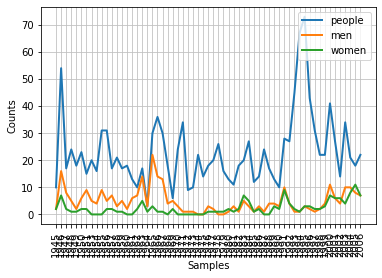

In [10]:
# 4.
state_union = nltk.corpus.state_union

cfd = nltk.ConditionalFreqDist(
    # target in ['men', 'women', 'people'] ; fileid[:4] -> year
    (target, fileid[:4])
    for fileid in state_union.fileids()
    for w in state_union.words(fileid)
    for target in ['men', 'women', 'people']
    if w.lower().startswith(target)
)

cfd.plot()

In [34]:
# 5.
word = "apple"
print([synset.definition() for synset in wn.synsets(word)])
print()

print([synset.member_meronyms() for synset in wn.synsets(word)])
print([synset.part_meronyms() for synset in wn.synsets(word)])
print([synset.substance_meronyms() for synset in wn.synsets(word)])
print()
print([synset.member_holonyms() for synset in wn.synsets(word)])
print([synset.part_holonyms() for synset in wn.synsets(word)])
print([synset.substance_holonyms() for synset in wn.synsets(word)])

['fruit with red or yellow or green skin and sweet to tart crisp whitish flesh', 'native Eurasian tree widely cultivated in many varieties for its firm rounded edible fruits']

[[], []]
[[], [Synset('apple.n.01')]]
[[], []]

[[], [Synset('malus.n.01')]]
[[Synset('apple.n.02')], []]
[[], []]


In [68]:
# 6.
translate = dict(nltk.corpus.swadesh.entries(['fr', 'en']))
print(translate["chien"])
print(translate["homme"])

try:
    translate["aimer"]
except KeyError:
    print("'aimer' is not in the list\n")

print("One problem is that the vocabulary is limited. Another is that one word can have multiple different meanings, e.g. for the word 'dog',")
print(len(wn.synsets("dog")), "different possible meanings for the word 'dog':\n")
print([w.definition() for w in wn.synsets("dog")])

dog
man (human being)
'aimer' is not in the list

One problem is that the vocabulary is limited. Another is that one word can have multiple different meanings, e.g. for the word 'dog',
8 different possible meanings for the word 'dog':

['a member of the genus Canis (probably descended from the common wolf) that has been domesticated by man since prehistoric times; occurs in many breeds', 'a dull unattractive unpleasant girl or woman', 'informal term for a man', 'someone who is morally reprehensible', 'a smooth-textured sausage of minced beef or pork usually smoked; often served on a bread roll', 'a hinged catch that fits into a notch of a ratchet to move a wheel forward or prevent it from moving backward', 'metal supports for logs in a fireplace', 'go after with the intent to catch']


7. According to Strunk and White's Elements of Style, the word however, used at the start of a sentence, means "in whatever way" or "to whatever extent", and not "nevertheless". They give this example of correct usage: However you advise him, he will probably do as he thinks best. (http://www.bartleby.com/141/strunk3.html) Use the concordance tool to study actual usage of this word in the various texts we have been considering.

8. Define a conditional frequency distribution over the Names corpus that allows you to see which initial letters are more frequent for males vs. females.

In [75]:
# 7.
nltk.Text(gutenberg.words("austen-emma.txt")).concordance("however")
print()
nltk.Text(gutenberg.words("austen-persuasion.txt")).concordance("however")
print()
nltk.Text(gutenberg.words("austen-sense.txt")).concordance("however")

Displaying 25 of 131 matches:
 her many enjoyments . The danger , however , was at present so unperceived , t
ion would offend . Miss Churchill , however , being of age , and with the full 
n . From the expense of the child , however , he was soon relieved . The boy ha
 -- and been very well brought up . However , I do not mean to set up my opinio
f and predict . It was not likely , however , that any body should have equalle
to be borne . We will not despair , however . Weston may grow cross from the wa
is so very handsome and agreeable . However , I do really think Mr . Martin a v
 accepted after all . This letter , however , was written , and sealed , and se
e him ." " And if I did , ( which , however , I am far from allowing ) I should
 slightingly . Waiving that point , however , and supposing her to be , as you 
e was not so materially cast down , however , but that a little time and the re
ld inspire him ." The very next day however produced some proof of inspiration 
and staid 

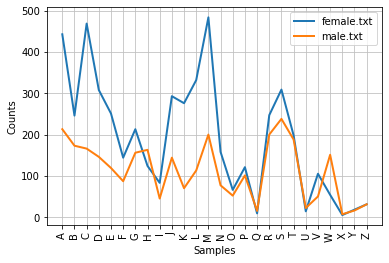

In [3]:
# 8.
names = nltk.corpus.names

cfd = nltk.ConditionalFreqDist(
    (fileid, name[0])
    for fileid in names.fileids()
    for name in names.words(fileid)
)

cfd.plot()

25. Define a function `find_language()` that takes a string as its argument, and returns a list of languages that have that string as a word. Use the udhr corpus and limit your searches to files in the Latin-1 encoding.

In [33]:
# 25.

def find_language(word: str) -> list:
    languages = [l for l in nltk.corpus.udhr.fileids() if "-Latin1" in l]
    print("number of languages: ", len(languages))

    return [l for l in languages if word in nltk.corpus.udhr.words(l)]

word = "man"
find_language(word)

number of languages:  190


['Bichelamar-Latin1',
 'Bikol_Bicolano-Latin1',
 'Cakchiquel-Latin1',
 'Chamorro-Latin1',
 'Chuuk_Trukese-Latin1',
 'English-Latin1',
 'Friulian_Friulano-Latin1',
 'Hiligaynon-Latin1',
 'Ibibio_Efik-Latin1',
 'Iloko_Ilocano-Latin1',
 'Kapampangan-Latin1',
 'Kiche_Quiche-Latin1',
 'Luxembourgish_Letzebuergeusch-Latin1',
 'Mam-Latin1',
 'Marshallese-Latin1',
 'NigerianPidginEnglish-Latin1',
 'Sharanahua-Latin1',
 'SolomonsPidgin_Pijin-Latin1',
 'Tiv-Latin1',
 'TokPisin-Latin1',
 'Trukese_Chuuk-Latin1',
 'Waray-Latin1']

27. The polysemy of a word is the number of senses it has. Using WordNet, we can determine that the noun dog has 7 senses with: `len(wn.synsets('dog', 'n'))`. Compute the average polysemy of nouns, verbs, adjectives and adverbs according to WordNet.

In [60]:
# 27.
# n = noun, v = verb, a = adjective, r = adverb

nb_words = 0
polysemy_nouns      = 0
polysemy_verbs      = 0
polysemy_adjectives = 0
polysemy_adverbs    = 0

for word in wn.words():
    nb_words += 1
    polysemy_nouns      += len(wn.synsets(word, 'n'))
    polysemy_verbs      += len(wn.synsets(word, 'v'))
    polysemy_adjectives += len(wn.synsets(word, 'a'))
    polysemy_adverbs    += len(wn.synsets(word, 'r'))

avg_polysemy_nouns      = polysemy_nouns      / nb_words
avg_polysemy_verbs      = polysemy_verbs      / nb_words
avg_polysemy_adjectives = polysemy_adjectives / nb_words
avg_polysemy_adverbs    = polysemy_adverbs    / nb_words

print("number of words in WordNet: ", nb_words)
print("avg_polysemy_nouns: ",      avg_polysemy_nouns)
print("avg_polysemy_verbs: ",      avg_polysemy_verbs)
print("avg_polysemy_adjectives: ", avg_polysemy_adjectives)
print("avg_polysemy_adverbs: ",    avg_polysemy_adverbs)

number of words in WordNet:  147306
avg_polysemy_nouns:  1.0089677270443838
avg_polysemy_verbs:  0.2903819260586806
avg_polysemy_adjectives:  0.20851153381396548
avg_polysemy_adverbs:  0.03812471997067329
